# NBA Game Data Exploratory Data Analysis (EDA)

This notebook performs exploratory data analysis on the collected NBA game data, including advanced feature engineering and performance metrics.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import os

# Set plot style
plt.style.use('seaborn')
sns.set_palette('viridis')

# Create directories for saving plots and processed data
os.makedirs('../data/processed', exist_ok=True)
os.makedirs('../plots', exist_ok=True)

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [2]:
# Load team data
teams_df = pd.read_csv('../data/teams.csv')
print("Teams Data:")
print(teams_df.info())
teams_df.head()

Teams Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            30 non-null     int64 
 1   full_name     30 non-null     object
 2   abbreviation  30 non-null     object
 3   nickname      30 non-null     object
 4   city          30 non-null     object
 5   state         30 non-null     object
 6   year_founded  30 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 1.8+ KB
None


,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [3]:
# Load game data for both seasons
seasons = ['2022-23', '2023-24']
games_dfs = []

for season in seasons:
    games_file = f'../data/games_{season}.csv'
    if os.path.exists(games_file):
        df = pd.read_csv(games_file)
        df['SEASON'] = season
        games_dfs.append(df)

# Combine all games data
games_df = pd.concat(games_dfs, ignore_index=True)
print("\nGames Data:")
print(games_df.info())
games_df.head()


Games Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5585 entries, 0 to 5584
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SEASON_ID          5585 non-null   int64  
 1   TEAM_ID            5585 non-null   int64  
 2   TEAM_ABBREVIATION  5585 non-null   object 
 3   TEAM_NAME          5585 non-null   object 
 4   GAME_ID            5585 non-null   int64  
 5   GAME_DATE          5585 non-null   object 
 6   MATCHUP            5585 non-null   object 
 7   WL                 5584 non-null   object 
 8   MIN                5585 non-null   int64  
 9   PTS                5585 non-null   int64  
 10  FGM                5585 non-null   int64  
 11  FGA                5585 non-null   int64  
 12  FG_PCT             5584 non-null   float64
 13  FG3M               5585 non-null   int64  
 14  FG3A               5585 non-null   int64  
 15  FG3_PCT            5584 non-null   float64
 16  FTM        

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,SEASON
0,42022,1610612748,MIA,Miami Heat,42200405,2023-06-12,MIA @ DEN,L,240,89,...,11,33,44,18,9,7,8,21,-5.0,2022-23
1,42022,1610612743,DEN,Denver Nuggets,42200405,2023-06-12,DEN vs. MIA,W,240,94,...,11,46,57,21,6,7,14,13,5.0,2022-23
2,42022,1610612743,DEN,Denver Nuggets,42200404,2023-06-09,DEN @ MIA,W,242,108,...,5,29,34,26,11,7,6,18,13.0,2022-23
3,42022,1610612748,MIA,Miami Heat,42200404,2023-06-09,MIA vs. DEN,L,240,95,...,8,29,37,23,2,3,14,19,-13.0,2022-23
4,42022,1610612748,MIA,Miami Heat,42200403,2023-06-07,MIA vs. DEN,L,240,94,...,10,23,33,20,7,3,4,22,-15.0,2022-23


In [4]:
# Basic statistics
print("\nBasic Statistics:")
print(games_df.describe())

# Check for null values
print("\nNull Values:")
print(games_df.isnull().sum())


Basic Statistics:
          SEASON_ID       TEAM_ID       GAME_ID          MIN          PTS  \
count   5585.000000  5.585000e+03  5.585000e+03  5585.000000  5585.000000   
mean   22876.573859  1.606575e+09  2.310467e+07   241.151656   113.662310   
std     5743.845544  8.054331e+07  5.743907e+06    11.507134    13.375602   
min    12022.000000  1.231500e+04  1.220000e+07     3.000000     0.000000   
25%    22022.000000  1.610613e+09  2.220056e+07   240.000000   105.000000   
50%    22023.000000  1.610613e+09  2.230002e+07   240.000000   113.000000   
75%    22023.000000  1.610613e+09  2.230072e+07   241.000000   122.000000   
max    62023.000000  1.610617e+09  6.230000e+07   292.000000   211.000000   

               FGM          FGA       FG_PCT         FG3M         FG3A  ...  \
count  5585.000000  5585.000000  5584.000000  5585.000000  5585.000000  ...   
mean     41.742525    88.322471     0.473645    12.511370    34.679141  ...   
std       5.559488     7.960147     0.055434     3

In [5]:
# Advanced Feature Engineering

# 1. Scoring Efficiency Metrics
games_df['eFG_PCT'] = (games_df['FGM'] + 0.5 * games_df['FG3M']) / games_df['FGA']
games_df['TS_PCT'] = games_df['PTS'] / (2 * (games_df['FGA'] + 0.44 * games_df['FTA']))
games_df['AST_TOV'] = games_df['AST'] / (games_df['TOV'] + 1e-5)  # Adding small value to avoid division by zero

# 2. Contextual Features
games_df['HOME_GAME'] = games_df['MATCHUP'].apply(lambda x: 1 if 'vs.' in x else 0)
games_df['GAME_DATE'] = pd.to_datetime(games_df['GAME_DATE'])

# 3. Calculate days since last game
games_df = games_df.sort_values(['TEAM_ID', 'GAME_DATE'])
games_df['DAYS_SINCE_LAST_GAME'] = games_df.groupby('TEAM_ID')['GAME_DATE'].diff().dt.days

# 4. Calculate win streaks
games_df['WIN'] = games_df['WL'].apply(lambda x: 1 if x == 'W' else 0)
games_df['WIN_STREAK'] = games_df.groupby('TEAM_ID')['WIN'].transform(
    lambda x: x.groupby((x != x.shift()).cumsum()).cumcount() + 1
)

# Display new features
print("\nNew Features:")
print(games_df[['eFG_PCT', 'TS_PCT', 'AST_TOV', 'HOME_GAME', 'DAYS_SINCE_LAST_GAME', 'WIN_STREAK']].head())


New Features:
       eFG_PCT    TS_PCT   AST_TOV  HOME_GAME  DAYS_SINCE_LAST_GAME  \
5549  0.574468  0.594792  1.866665          1                   NaN   
5447  0.479167  0.497382  0.629629          0                   NaN   
2774  0.698795  0.729847  1.272727          0                   NaN   
2736  0.433673  0.455052  2.749997          0                   4.0   
5544  0.337349  0.368304  0.666666          0                   NaN   

      WIN_STREAK  
5549           1  
5447           1  
2774           1  
2736           1  
5544           1  


KeyboardInterrupt: 

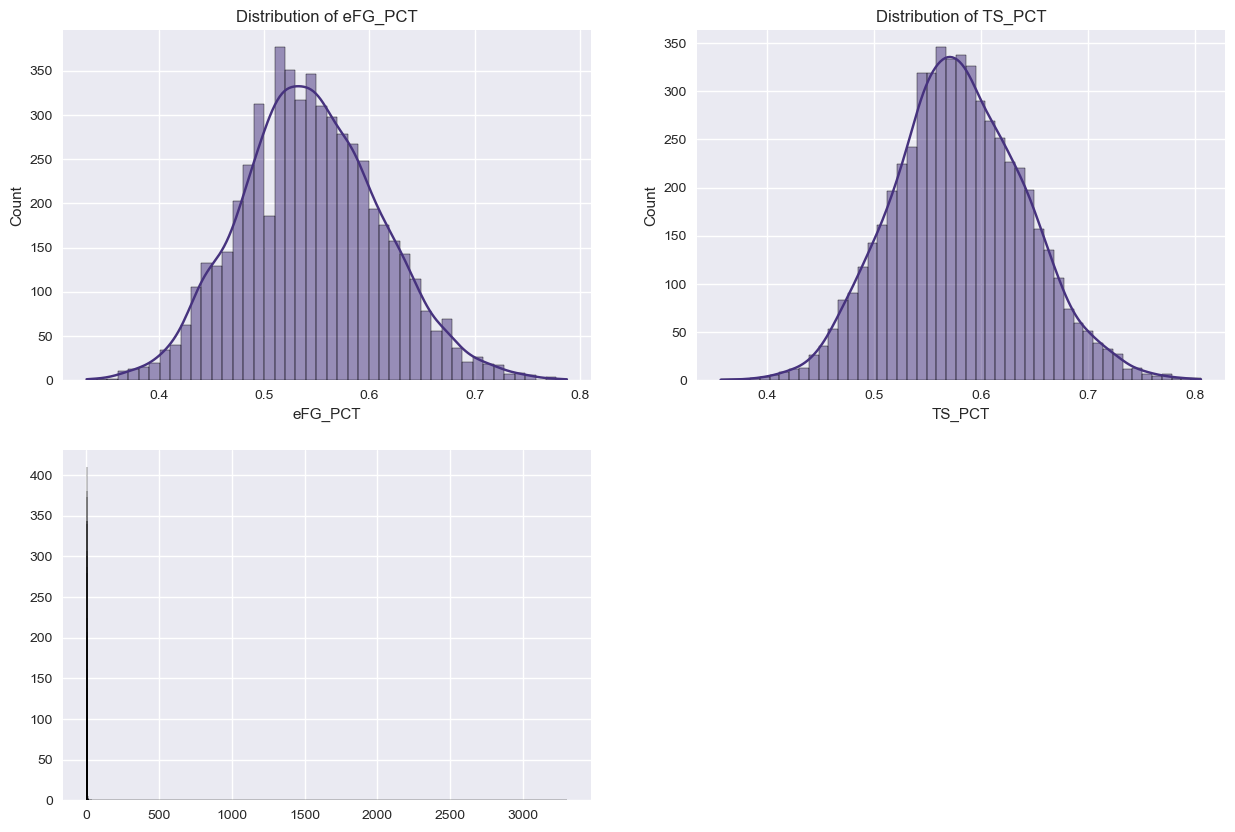

In [6]:
# Distribution of Advanced Metrics
plt.figure(figsize=(15, 10))

# Create subplots for each metric
metrics = ['eFG_PCT', 'TS_PCT', 'AST_TOV']
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.histplot(games_df[metric], kde=True)
    plt.title(f'Distribution of {metric}')
    plt.xlabel(metric)

plt.tight_layout()
plt.savefig('../plots/advanced_metrics_distribution.png')
plt.show()

In [ ]:
# Correlation Analysis of Advanced Features
advanced_features = ['eFG_PCT', 'TS_PCT', 'AST_TOV', 'HOME_GAME', 'DAYS_SINCE_LAST_GAME', 'WIN_STREAK', 'WL']
corr_df = games_df[advanced_features].copy()
corr_df['WL'] = corr_df['WL'].apply(lambda x: 1 if x == 'W' else 0)

# Calculate correlation matrix
corr_matrix = corr_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Advanced Features')
plt.savefig('../plots/advanced_features_correlation.png')
plt.show()

In [7]:
# Rolling Statistics Analysis
def calculate_rolling_stats(df, window=5):
    rolling_stats = df.sort_values('GAME_DATE').groupby('TEAM_ID').rolling(
        window=window,
        on='GAME_DATE'
    ).agg({
        'PTS': ['mean', 'std'],
        'eFG_PCT': ['mean', 'std'],
        'TS_PCT': ['mean', 'std'],
        'AST_TOV': ['mean', 'std'],
        'REB': ['mean', 'std'],
        'PLUS_MINUS': ['mean', 'std']
    }).reset_index()
    
    # Flatten column names
    rolling_stats.columns = ['TEAM_ID', 'GAME_DATE'] + [
        f'rolling_{col[0]}_{col[1]}' for col in rolling_stats.columns[2:]
    ]
    return rolling_stats

# Calculate rolling stats for different windows
rolling_5 = calculate_rolling_stats(games_df, window=5)
rolling_10 = calculate_rolling_stats(games_df, window=10)

# Save rolling stats
rolling_5.to_csv('../data/processed/rolling_stats_5.csv', index=False)
rolling_10.to_csv('../data/processed/rolling_stats_10.csv', index=False)

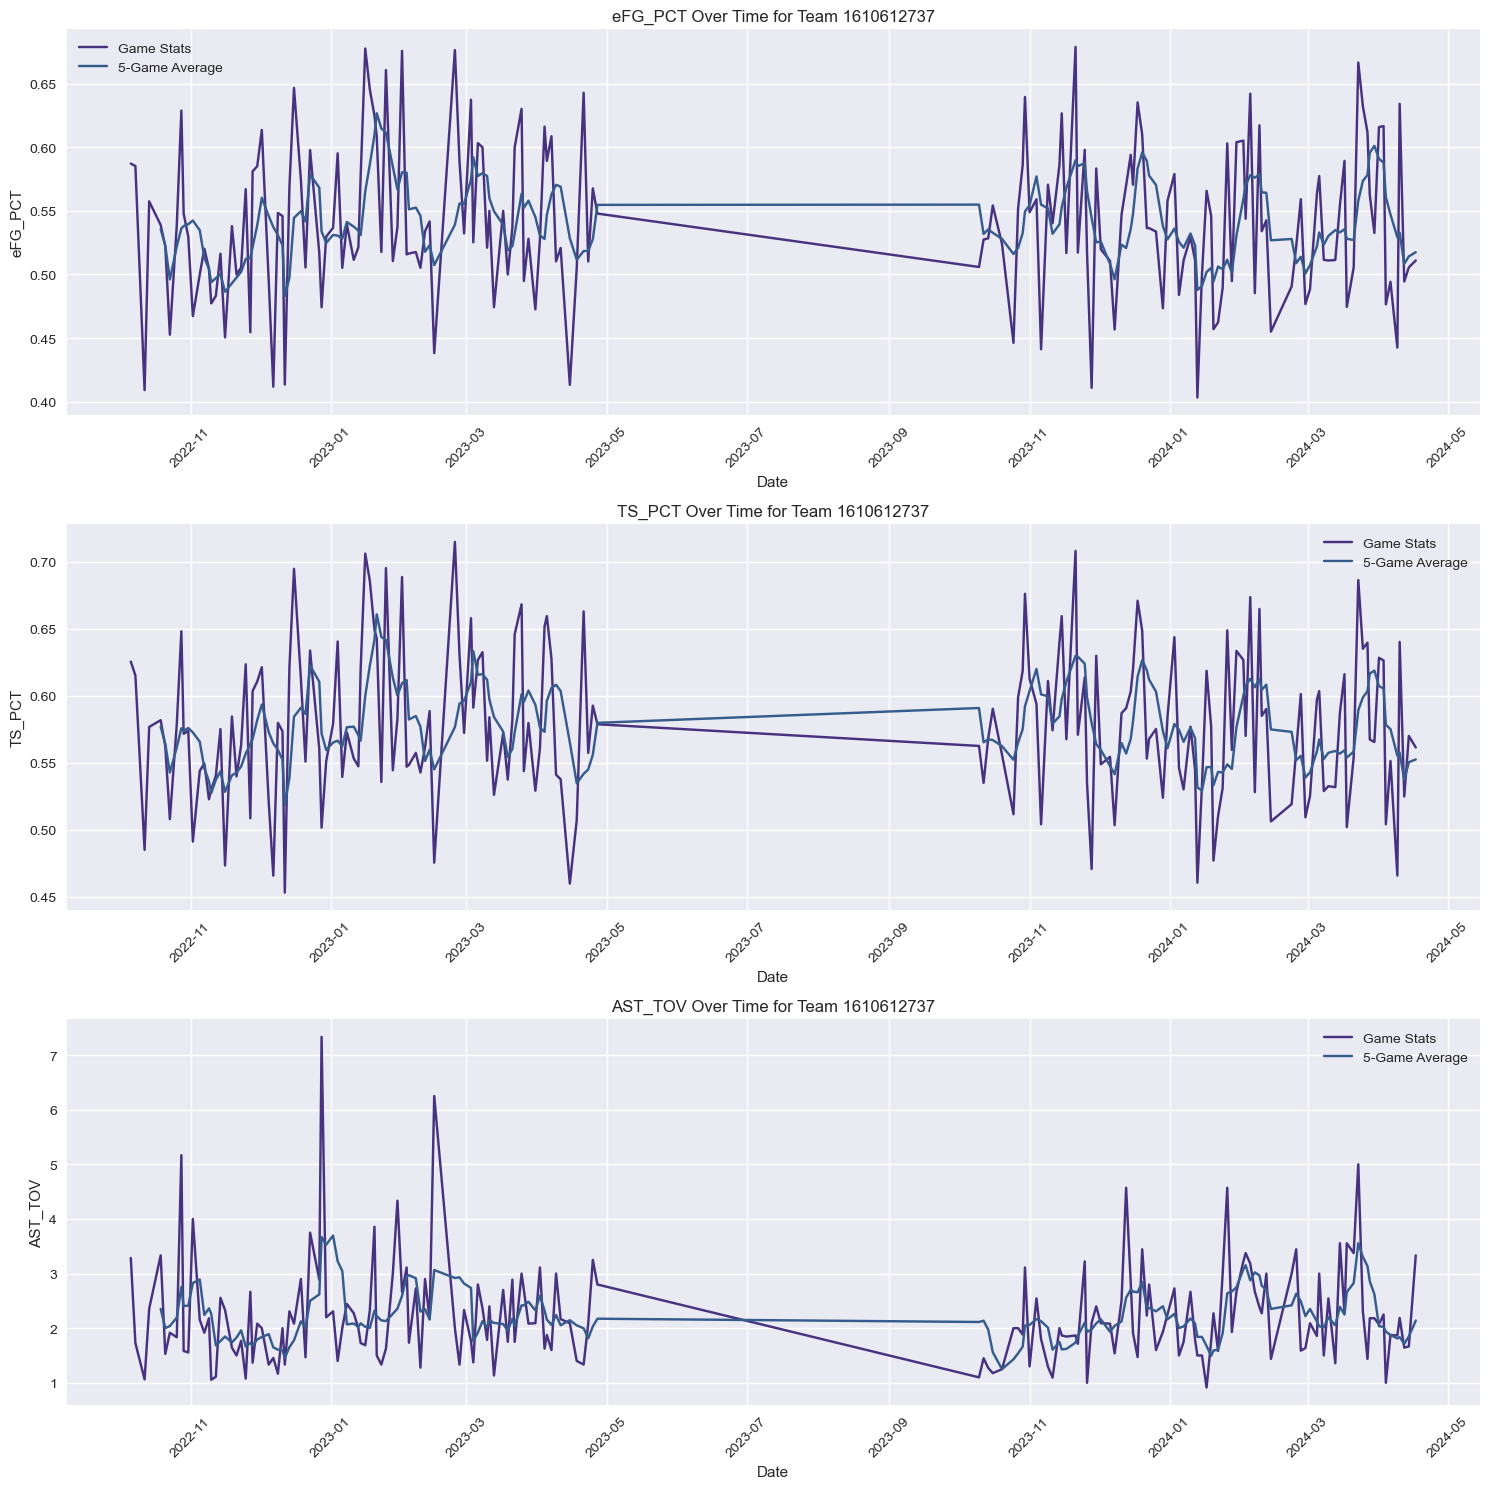

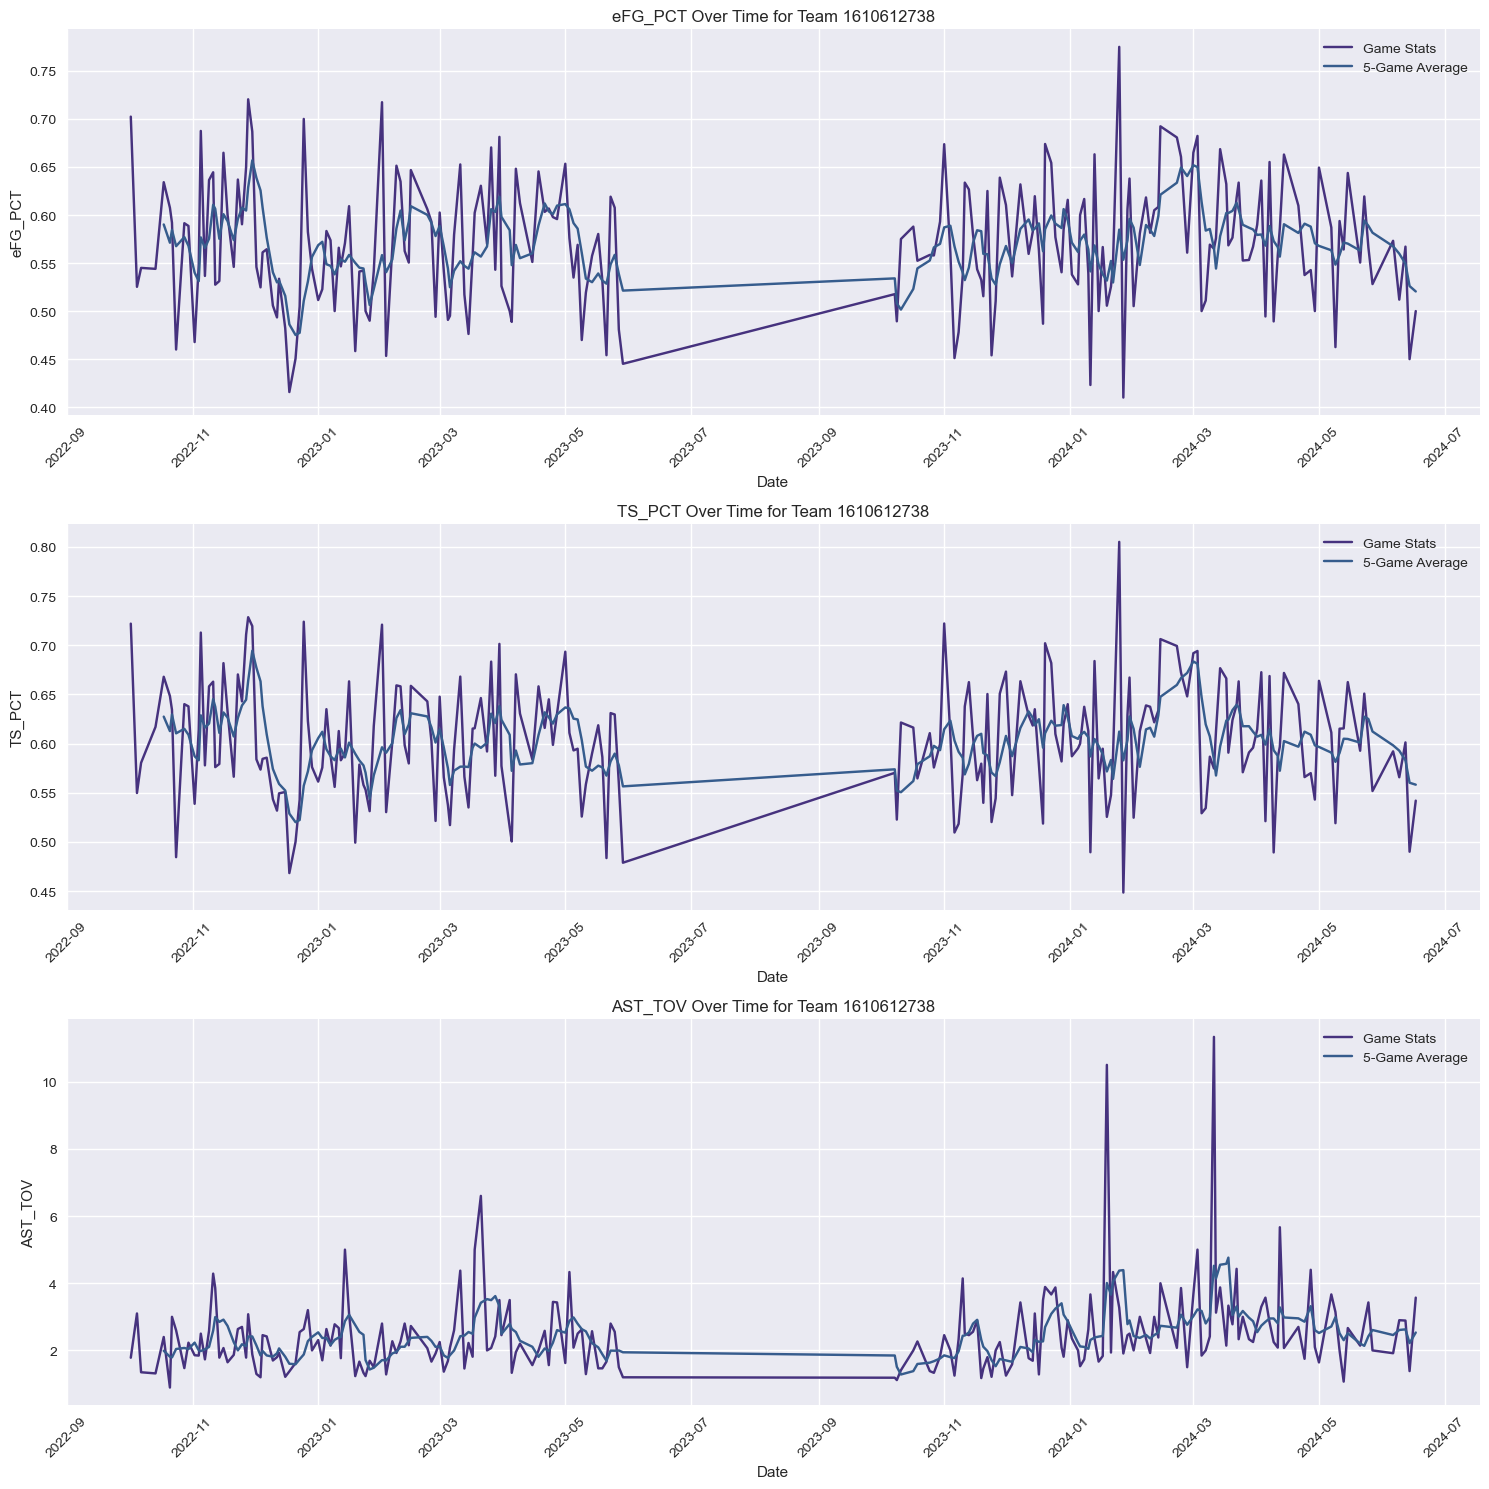

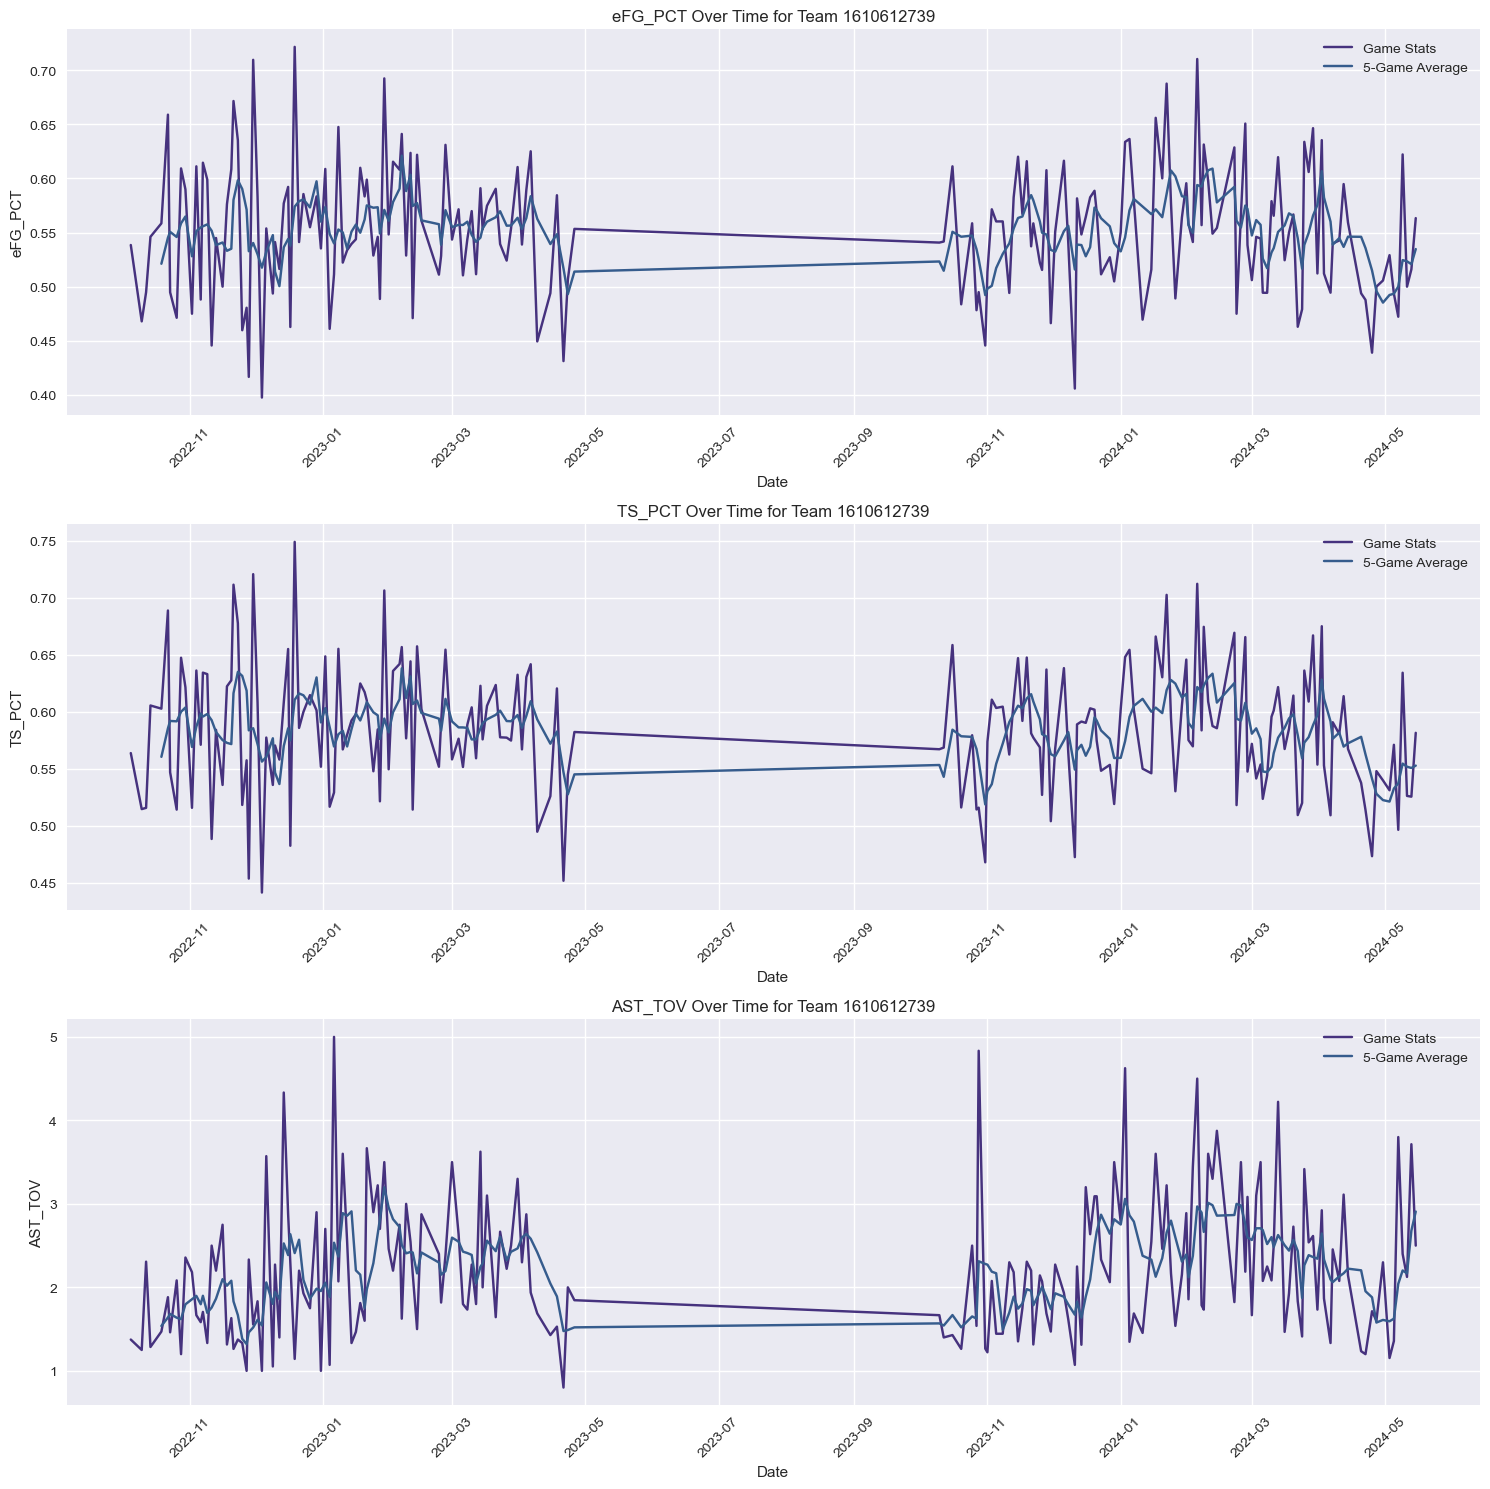

In [8]:
# Team Performance Analysis
def plot_team_performance(team_id, metrics=['eFG_PCT', 'TS_PCT', 'AST_TOV']):
    team_games = games_df[games_df['TEAM_ID'] == team_id].sort_values('GAME_DATE')
    
    plt.figure(figsize=(15, 5 * len(metrics)))
    for i, metric in enumerate(metrics, 1):
        plt.subplot(len(metrics), 1, i)
        plt.plot(team_games['GAME_DATE'], team_games[metric], label='Game Stats')
        plt.plot(team_games['GAME_DATE'], team_games[metric].rolling(window=5).mean(), 
                label='5-Game Average')
        plt.title(f'{metric} Over Time for Team {team_id}')
        plt.xlabel('Date')
        plt.ylabel(metric)
        plt.legend()
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.savefig(f'../plots/team_{team_id}_performance.png')
    plt.show()

# Example: Plot performance for a few teams
for team_id in teams_df['id'].head(3):
    plot_team_performance(team_id)

<Figure size 1200x600 with 0 Axes>

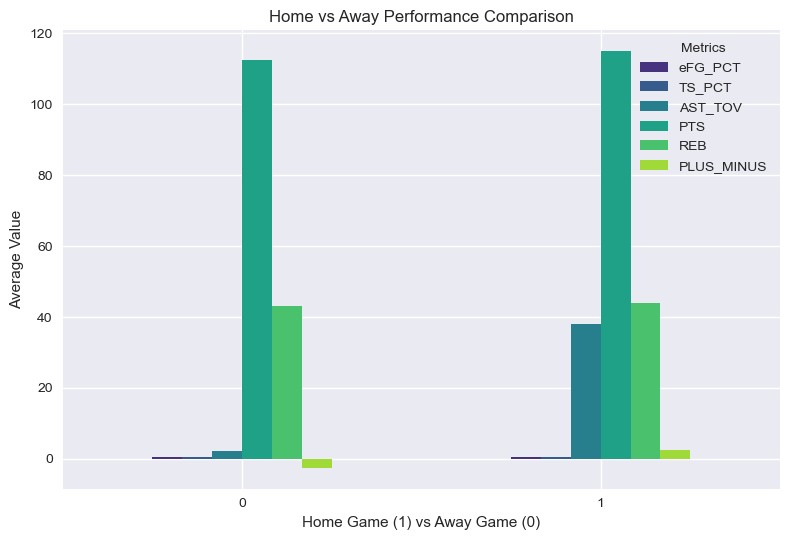

In [9]:
# Home vs Away Performance Analysis
home_away_stats = games_df.groupby('HOME_GAME').agg({
    'eFG_PCT': 'mean',
    'TS_PCT': 'mean',
    'AST_TOV': 'mean',
    'PTS': 'mean',
    'REB': 'mean',
    'PLUS_MINUS': 'mean'
}).reset_index()

# Plot home vs away performance
plt.figure(figsize=(12, 6))
home_away_stats.set_index('HOME_GAME').plot(kind='bar')
plt.title('Home vs Away Performance Comparison')
plt.xlabel('Home Game (1) vs Away Game (0)')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.tight_layout()
plt.savefig('../plots/home_away_comparison.png')
plt.show()

In [11]:
# Save processed data with new features
games_df.to_csv('../data/processed/processed_games_with_features.csv', index=False)

# Save team statistics
team_stats = games_df.groupby('TEAM_ID').agg({
    'eFG_PCT': ['mean', 'std'],
    'TS_PCT': ['mean', 'std'],
    'AST_TOV': ['mean', 'std'],
    'PTS': ['mean', 'std'],
    'REB': ['mean', 'std'],
    'PLUS_MINUS': ['mean', 'std']
}).reset_index()

team_stats.columns = ['TEAM_ID'] + [f'{col[0]}_{col[1]}' for col in team_stats.columns[1:]]
team_stats.to_csv('../data/processed/team_advanced_stats.csv', index=False)